In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_train.drop('Cabin',axis=1,inplace=True)   #permanent drop
df_test.drop('Cabin',axis=1,inplace=True)

In [8]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [9]:
df_train['Age'].fillna(value=df_train['Age'].mean(),inplace=True)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [11]:
df_test['Age'].fillna(value=df_train['Age'].mean(),inplace=True)

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [13]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
df_train['Embarked'].fillna(value = df_train['Embarked'].mode()[0],inplace=True)

In [15]:
df_train['Embarked'].mode()

0    S
dtype: object

In [16]:
df_train['Embarked'].mode()[0]

'S'

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


(array([646.,   0.,   0.,   0.,   0., 168.,   0.,   0.,   0.,  77.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

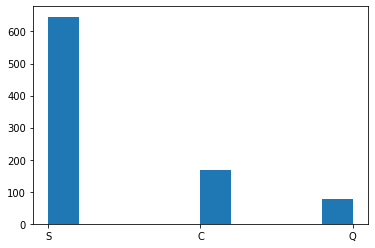

In [18]:
plt.hist(df_train['Embarked'])

In [19]:
df_test['Fare']

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

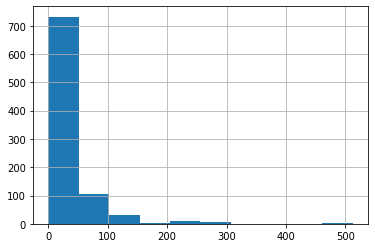

In [20]:
df_train['Fare'].hist()

In [21]:
df_test['Fare'].fillna(value = df_train['Fare'].median(),inplace = True)

In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [23]:
df_train.drop(['Name','PassengerId'],axis=1,inplace=True)
PassengerId_test = df_test['PassengerId']     #cause we need passenger id for submission so storing in diff variable
df_test.drop(['Name','PassengerId'],axis=1,inplace=True)

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [25]:
df_train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [26]:
df_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [27]:
df_train.drop('Ticket',axis=1,inplace=True)
df_test.drop('Ticket',axis=1,inplace=True)

In [28]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [29]:
df_train['Male'] = pd.get_dummies(df_train['Sex'],drop_first=True)
df_train.drop('Sex',axis=1,inplace=True)
df_test['Male'] = pd.get_dummies(df_test['Sex'],drop_first=True)
df_test.drop('Sex',axis=1,inplace=True)

In [30]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [31]:
temp = pd.get_dummies(df_train['Embarked'],prefix='Embarked')
df_train_final = pd.concat([df_train,temp],axis=1)
df_train_final.drop('Embarked',axis=1,inplace=True)

In [32]:
df_train_final.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


In [33]:
df_train_final.corr()['Survived']

Survived      1.000000
Pclass       -0.338481
Age          -0.069809
SibSp        -0.035322
Parch         0.081629
Fare          0.257307
Male         -0.543351
Embarked_C    0.168240
Embarked_Q    0.003650
Embarked_S   -0.149683
Name: Survived, dtype: float64

In [34]:
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Male
0,3,34.5,0,0,7.8292,Q,1
1,3,47.0,1,0,7.0000,S,0
2,2,62.0,0,0,9.6875,Q,1
3,3,27.0,0,0,8.6625,S,1
4,3,22.0,1,1,12.2875,S,0


In [35]:
temp2 = pd.get_dummies(df_test['Embarked'],prefix='Embarked')
df_test_final = pd.concat([df_test,temp2],axis=1)
df_test_final.drop('Embarked',axis=1,inplace=True)

In [36]:
df_test_final.head()

,Pclass,Age,SibSp,Parch,Fare,Male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,0,1,0
1,3,47.0,1,0,7.0000,0,0,0,1
2,2,62.0,0,0,9.6875,1,0,1,0
3,3,27.0,0,0,8.6625,1,0,0,1
4,3,22.0,1,1,12.2875,0,0,0,1


In [37]:
x = df_train_final[['Pclass','Age','SibSp','Parch','Fare','Male','Embarked_C','Embarked_Q','Embarked_S']]
y = df_train_final['Survived']

In [80]:
x.shape,y.shape

((891, 9), (891,), (418, 9), (223,))

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [84]:
x_train.shape, y_train.shape,x_test.shape,y_test.shape

((668, 9), (668,), (223, 9), (223,))

In [85]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [86]:
model = RFC()

In [87]:
paragrid = {'n_estimators': [50,75,80,90,100,110,120,125,130,140,150,200,300,400,500],
               'max_depth': [1,2,3,4,5,10,20],
               'min_samples_split': [3,4,5,6,7,8,9,10],
               'min_samples_leaf': [2,3,4,5,6],
               }

In [88]:
from sklearn.model_selection import RandomizedSearchCV

In [89]:
RSCV = RandomizedSearchCV(estimator=model,param_distributions=paragrid,cv=5,n_iter=100)

In [90]:
RSCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [91]:
RSCV.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [92]:
modelRFC = RFC(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [93]:
modelRFC.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
modelRFC.score(x_test,y_test)

0.8295964125560538

In [95]:
x_test = df_test_final
y_predict = modelRFC.predict(x_test)

In [96]:
df_submit = pd.DataFrame({'PassengerId':PassengerId_test,'Survived':y_predict})

In [97]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [98]:
df_submit.to_csv('Submit_04.csv',index=False)